### Instructions

1. Load the dataset and explore the variables.
2. We will try to predict variable `Churn` using a logistic regression on variables `tenure`, `SeniorCitizen`,`MonthlyCharges`.
3. Extract the target variable.
4. Extract the independent variables and scale them.
5. Build the logistic regression model.
6. Evaluate the model.
7. Even a simple model will give us more than 70% accuracy. Why?
8. **Synthetic Minority Oversampling TEchnique (SMOTE)** is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply `imblearn.over_sampling.SMOTE` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?
9. **Tomek links** are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply `imblearn.under_sampling.TomekLinks` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

### Get the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('files_for_lab/customer_churn.csv')

### Data exploration

In [3]:
display(df.head())
df.info()
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Get the target and the variables

In [4]:
target=df['Churn']
target.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [5]:
variables=['tenure', 'SeniorCitizen','MonthlyCharges']
features=df[variables]
display(features)
features.describe()

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70
...,...,...,...
7038,24,0,84.80
7039,72,0,103.20
7040,11,0,29.60
7041,4,1,74.40


,tenure,SeniorCitizen,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,0.162147,64.761692
std,24.559481,0.368612,30.090047
min,0.000000,0.000000,18.250000
25%,9.000000,0.000000,35.500000
50%,29.000000,0.000000,70.350000
75%,55.000000,0.000000,89.850000
max,72.000000,1.000000,118.750000


In [6]:
data=pd.concat([features,target],axis=1)
data

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes
...,...,...,...,...
7038,24,0,84.80,No
7039,72,0,103.20,No
7040,11,0,29.60,No
7041,4,1,74.40,Yes


In [7]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')

### EDA

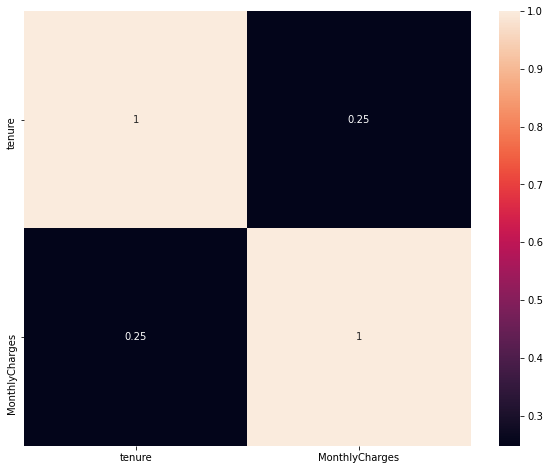

In [8]:
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

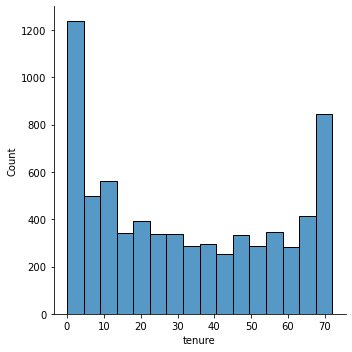

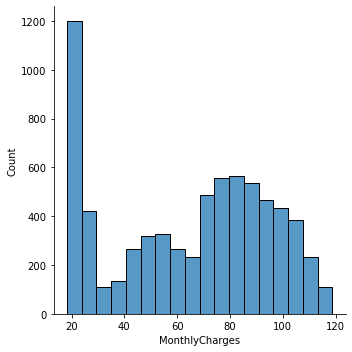

In [9]:
for col in data.select_dtypes(np.number):
    sns.displot(data[col])
    plt.show()

### Feature Engineering

In [10]:
def boxcox_transform(df):
    from scipy import stats
    numeric_cols = df.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        df[column] = np.where(df[column]<=0, np.NAN, df[column]) 
        df[column] = df[column].fillna(df[column].mean())
        transformed_data, ci = stats.boxcox(df[column])
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci

data_trans, _ci = boxcox_transform(data)
data_trans

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,0.000000,0,23.578295,No
1,8.796285,0,43.571734,No
2,0.815814,0,41.332735,Yes
3,10.300457,0,32.892530,No
4,0.815814,0,53.391036,Yes
...,...,...,...,...
7038,7.177193,0,63.300009,No
7039,13.299215,0,76.033726,No
7040,4.364654,0,23.388387,No
7041,1.936485,1,56.005603,Yes


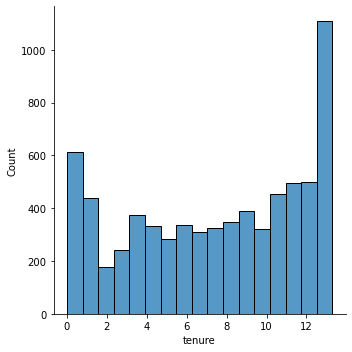

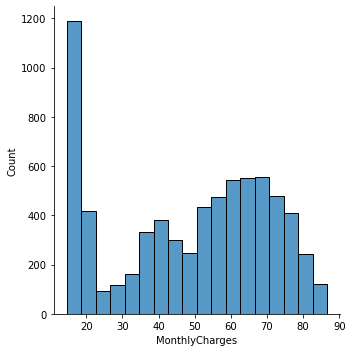

In [11]:
for col in data_trans.select_dtypes(np.number):
    sns.displot(data_trans[col])
    plt.show()

### Training the model

In [12]:
X=data_trans.drop('Churn', axis=1)
y=data_trans['Churn']
display(X)
display(y)

,tenure,SeniorCitizen,MonthlyCharges
0,0.000000,0,23.578295
1,8.796285,0,43.571734
2,0.815814,0,41.332735
3,10.300457,0,32.892530
4,0.815814,0,53.391036
...,...,...,...
7038,7.177193,0,63.300009
7039,13.299215,0,76.033726
7040,4.364654,0,23.388387
7041,1.936485,1,56.005603


0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(random_state=42, multi_class='multinomial', max_iter=500) # max_iter
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42)

In [14]:
y_train.value_counts()

No     3635
Yes    1295
Name: Churn, dtype: int64

### Model Evaluation

In [15]:
model.score(X_test, y_test)

0.795551348793185

In [16]:
predictions = model.predict(X_test)
pd.Series(predictions).value_counts()

No     1741
Yes     372
dtype: int64

In [17]:
y_test.value_counts()

No     1539
Yes     574
Name: Churn, dtype: int64

In [18]:
confusion_matrix(y_test, predictions)

array([[1424,  115],
       [ 317,  257]])

<AxesSubplot:>

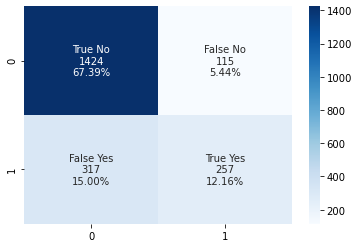

In [19]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True No', 'False No', 'False Yes', 'True Yes']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2) #Modify this accordingly
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

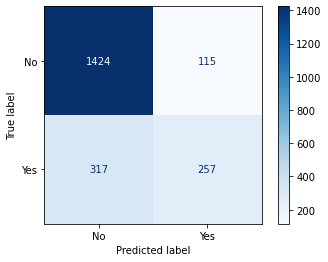

In [20]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test, cmap='Blues')
plt.show()

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.82      0.93      0.87      1539
         Yes       0.69      0.45      0.54       574

    accuracy                           0.80      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.80      0.78      2113



The accuracy over 70% is obtained because the model is trained with a much higher number of "No" outcomes than "Yes", and as such it predicts with very high accuracy the "No".

However, as we can see in the confusion matrix and in the recall values, the model predicts true "Yes" almost as often as false "Yes".

## Improving the Model

### Synthetic Minority Oversampling TEchnique (SMOTE)

#### Training the model with oversampling

In [22]:
#Get X's and y's
X=data_trans.drop('Churn', axis=1)
y=data_trans['Churn']

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Apply oversampling to X_train and y_train
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
display(y_train_sm.value_counts())

#Train the model
model = LogisticRegression(random_state=42, multi_class='multinomial', max_iter=500) # max_iter
model.fit(X_train_sm, y_train_sm)

Yes    3635
No     3635
Name: Churn, dtype: int64

LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42)

#### Evaluating the model

Score = 0.7401798390913393


No     1246
Yes     867
dtype: int64

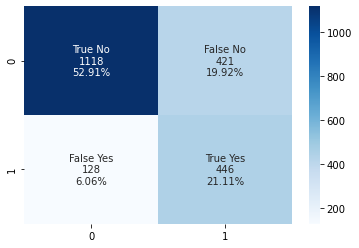

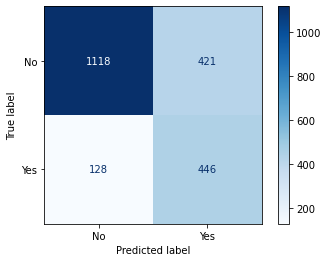

              precision    recall  f1-score   support

          No       0.90      0.73      0.80      1539
         Yes       0.51      0.78      0.62       574

    accuracy                           0.74      2113
   macro avg       0.71      0.75      0.71      2113
weighted avg       0.79      0.74      0.75      2113



In [23]:
#X_test_=X_test.drop_duplicates(ignore_index=True)
print("Score =",model.score(X_test, y_test))
predictions = model.predict(X_test)
display(pd.Series(predictions).value_counts())
y_test.value_counts()

confusion_matrix(y_test, predictions)
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True No', 'False No', 'False Yes', 'True Yes']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2) #Modify this accordingly
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
plot_confusion_matrix(model, X_test, y_test, cmap='Blues')
plt.show()
print(classification_report(y_test, predictions))

There is a significant improvement in the model. The score is  similar to the one we had before (0.75), yet now the recalls are much better, with a 74% for the 'No' and a 77% for the 'Yes'. It's true that the relative number of false 'No' is higher, but that's the trade-off for an improved quality.

### Tomek links

#### Training the model with oversampling

In [24]:
#Get X's and y's
X=data_trans.drop('Churn', axis=1)
y=data_trans['Churn']

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Apply undersampling to X_train and y_train
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()

X_train_res, y_train_res = tl.fit_resample(X_train, y_train)
display(y_train_res.value_counts())

#Train the model
model = LogisticRegression(random_state=42, multi_class='multinomial', max_iter=500) # max_iter
model.fit(X_train_res, y_train_res)

No     3283
Yes    1295
Name: Churn, dtype: int64

LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42)

#### Evaluating the model

Score = 0.7950780880265026


No     1656
Yes     457
dtype: int64

No     1539
Yes     574
Name: Churn, dtype: int64

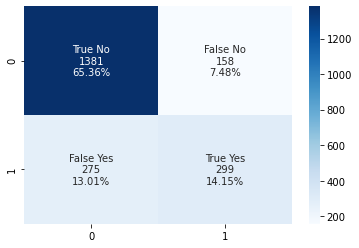

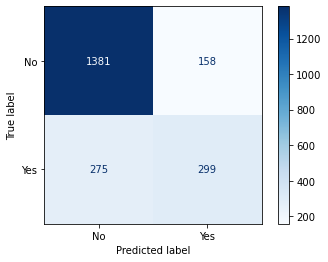

              precision    recall  f1-score   support

          No       0.83      0.90      0.86      1539
         Yes       0.65      0.52      0.58       574

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [25]:
X_test_=X_test.drop_duplicates(ignore_index=True)

#Score and predictions
print("Score =",model.score(X_test, y_test))
predictions = model.predict(X_test)
display(pd.Series(predictions).value_counts())
display(y_test.value_counts())

#Confusion matrices
confusion_matrix(y_test, predictions)
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True No', 'False No', 'False Yes', 'True Yes']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2) #Modify this accordingly
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
plot_confusion_matrix(model, X_test, y_test, cmap='Blues')
plt.show()
print(classification_report(y_test, predictions))

With the TOMEK undersampling, we are not seeing a major improvement in the model. While the score increases (which is not so relevant here), the recall value for the 'Yes' prediction is only 0.51. In other words, there is an almost equal chance of predicting true 'Yes' than it being false.